In [41]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

Wszystkie potrzebne importy | All necessary imports

In [42]:

current_dir = os.getcwd()
data_dir = os.path.join(current_dir, 'Training1')
test_dir = os.path.join(current_dir, 'Test1')
image_count = len(glob.glob(data_dir + '/*/*.jpg'))
print("Zestaw do trenowania")
print(image_count)
image_count = len(glob.glob(test_dir + '/*/*.jpg'))
print("Zestaw do testowania")
print(image_count)

Zestaw do trenowania
67692
Zestaw do testowania
22688


Przygotowanie folderów ze zdjęciami | Preping directiories with photos

In [43]:
batch_size = 32
img_height = 100
img_width = 100

Rozmiar zdjęć | Photo size

In [44]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 67692 files belonging to 131 classes.
Using 54154 files for training.


Dane treningowe | Training data

In [45]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 67692 files belonging to 131 classes.
Using 13538 files for validation.


Dane walidacyjne | Validation data

In [46]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 22688 files belonging to 131 classes.


Dane testowe | Test data

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

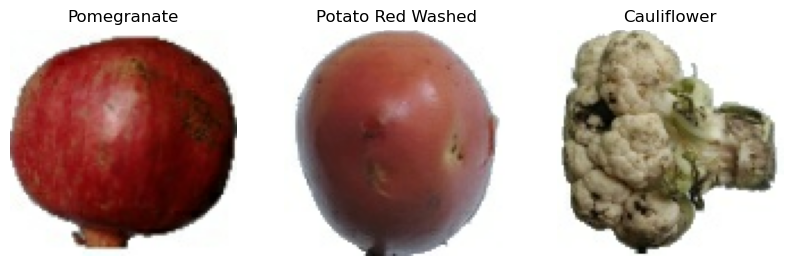

In [47]:
class_names = train_ds.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Pokaz zdjęć | Photo showcase

In [48]:
num_classes = len(class_names)
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

Obiekt modelu sekwencyjnego | Sequential Model Object

Input\
Określenie kształtu danych wejściowych oraz kanałów odpowiedzialnych za kolory.\
Rescaling\
Warstwa normalizacji, która przeskalowuje wartości pikseli obrazów. \
Conv2D\
Warstwa konwolucyjna z funkcją aktywacji ReLU.\
MaxPooling2D\
Warstwy poolingowe wykonujące operację maksymalnego poolingu. \
Flatten\
Warstwa, która spłaszcza dane wejściowe z trójwymiarowej tablicy do jednowymiarowego wektora.\
Dense\
Warstwy gęsto połączone z funkcją aktywacji ReLU.\
Ostatnia warstwa gęsto połączona z funkcją aktywacji softmax.


In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 131)            │        16,899 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,220,259 (4.65 MB)

 Trainable params: 1,220,259 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

Kompilacja modelu | Model compilation

In [50]:
epochs=4
learn = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
test_loss,test_accuracy = model.evaluate(test_ds)

Epoch 1/4
1693/1693 ━━━━━━━━━━━━━━━━━━━━ 95s 55ms/step - accuracy: 0.6790 - loss: 1.3921 - val_accuracy: 0.9898 - val_loss: 0.0317
Epoch 2/4
1693/1693 ━━━━━━━━━━━━━━━━━━━━ 99s 59ms/step - accuracy: 0.9875 - loss: 0.0470 - val_accuracy: 0.9993 - val_loss: 0.0027
Epoch 3/4
1693/1693 ━━━━━━━━━━━━━━━━━━━━ 89s 53ms/step - accuracy: 0.9926 - loss: 0.0282 - val_accuracy: 0.9904 - val_loss: 0.0280
Epoch 4/4
1693/1693 ━━━━━━━━━━━━━━━━━━━━ 99s 58ms/step - accuracy: 0.9926 - loss: 0.0274 - val_accuracy: 0.9973 - val_loss: 0.0093
709/709 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9498 - loss: 0.2245


Trenowanie modelu | Model training\
Testowanie na danych testowych | Testing using test data

In [51]:
test_image_path = os.path.join("zdjdotestu", "notLychee.jpg")
image = cv2.imread(test_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (100, 100))
prediction = model.predict(image.reshape(1, 100, 100, 3), batch_size=1)
probability = tf.nn.softmax(prediction)
predicted_class = np.argmax(probability)
predicted_class_name = class_names[predicted_class]
print("Rodzaj:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Rodzaj: Banana Red


Przetestowanie modelu | Testing

In [52]:
model.save('fruit_model.h5')

Zapisywanie modelu | Saving model